In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [2]:
from sklearn import datasets

# Loading the data from scikit-learn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [13]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [57]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)
import warnings
warnings.filterwarnings("ignore")
# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

16.9 ms ± 3.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
def plot_pred(y_pred):
 pca = PCA(n_components=2).fit_transform(X_std)
 plt.figure(figsize=(8,3))
 colours = 'rbg'
 for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

 plt.xticks([])
 plt.yticks([])
 plt.axis('off')
 plt.show()

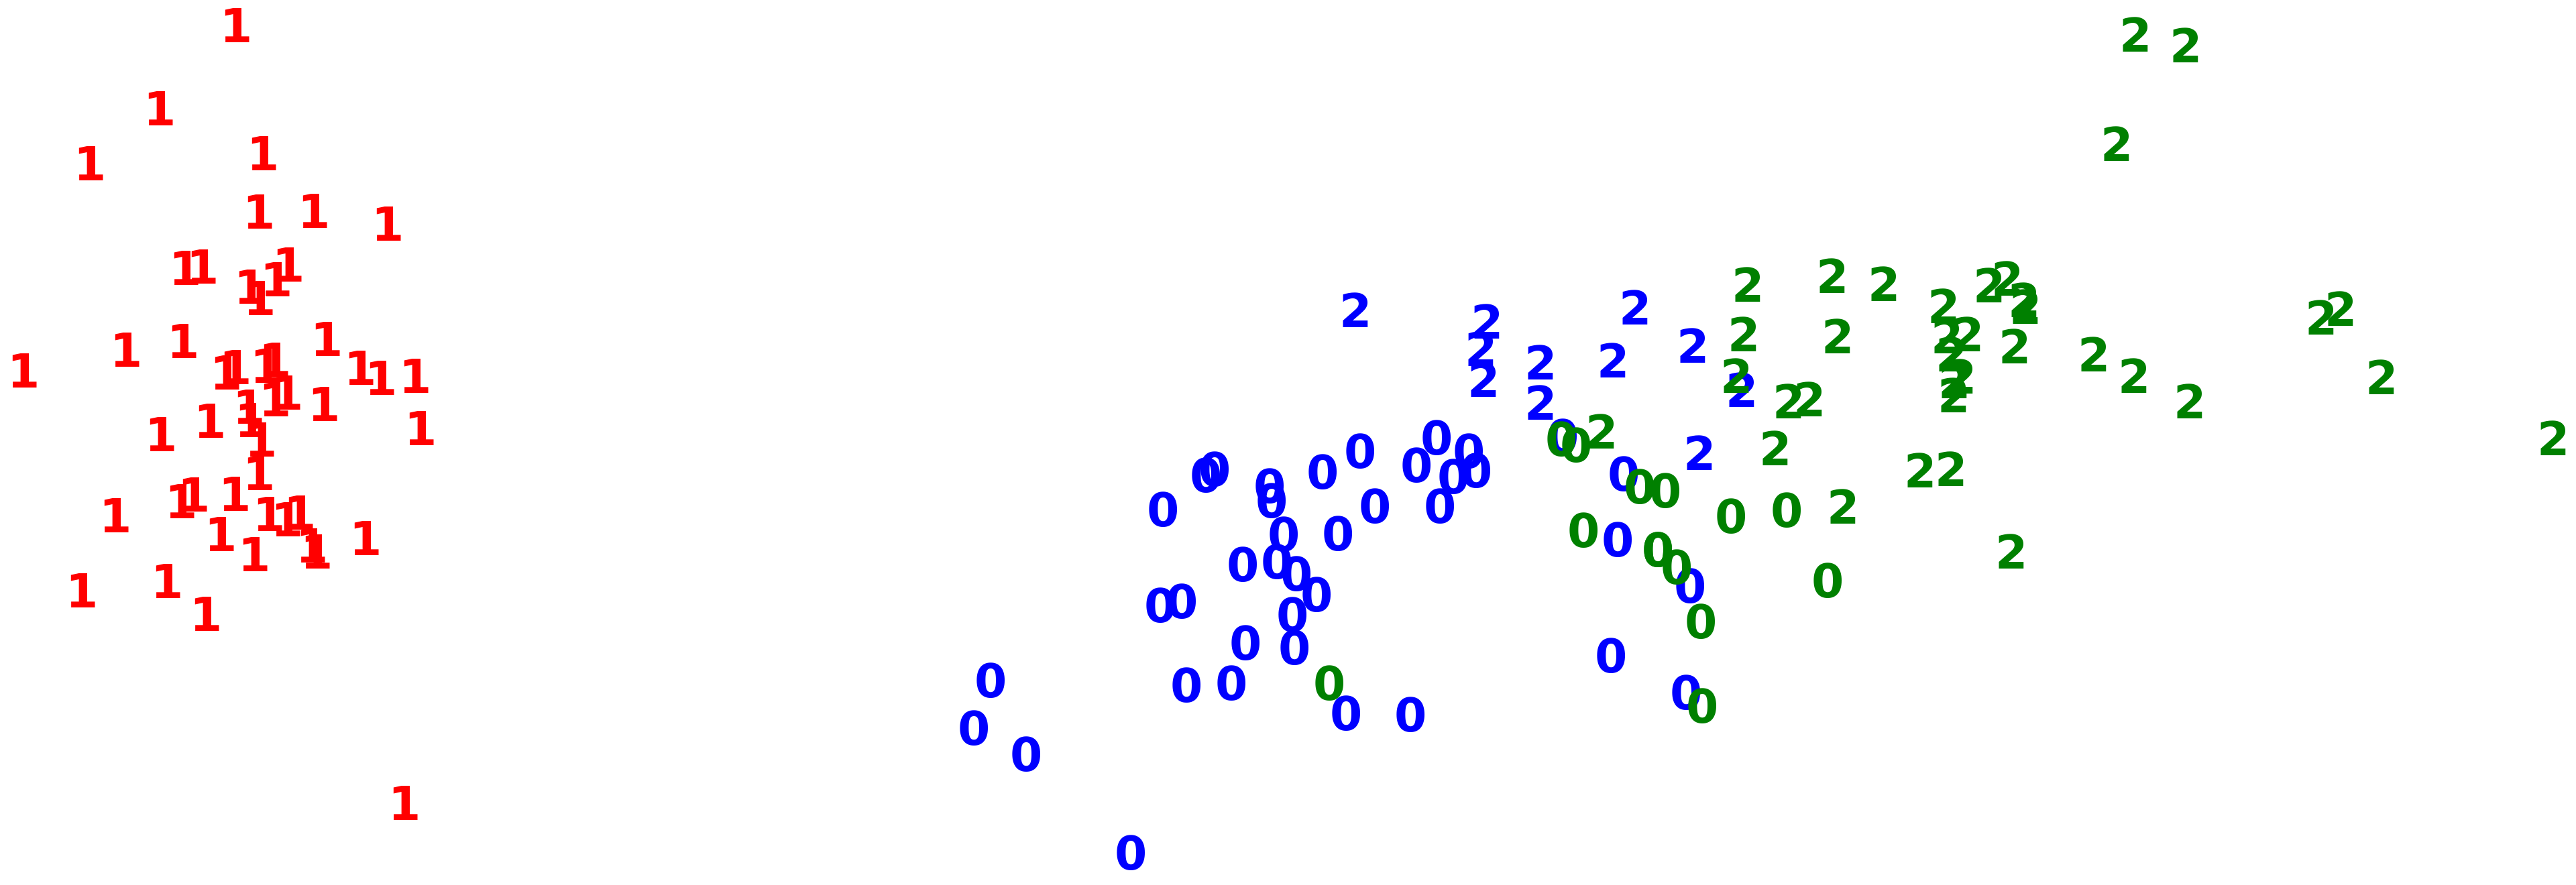

In [16]:
plot_pred(y_pred)

In [18]:
full_pred = np.array([0 if x == 1 else 1 if x==0 else 2 for x in y_pred])

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,39,11
2,0,14,36


In [28]:
from sklearn import datasets, metrics
print('silhouette_score:',metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
print('random index:' , metrics.rand_score(y,y_pred))
print('adjusted random index:' ,metrics.adjusted_rand_score(y,y_pred))

silhouette_score: 0.3218350908849432
random index: 0.7510514541387024
adjusted random index: 0.32017699231152746


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running with 2 groups
silhouette_score: 0.5817500491982808
random index: 0.7762863534675615
adjusted random index: 0.5681159420289855


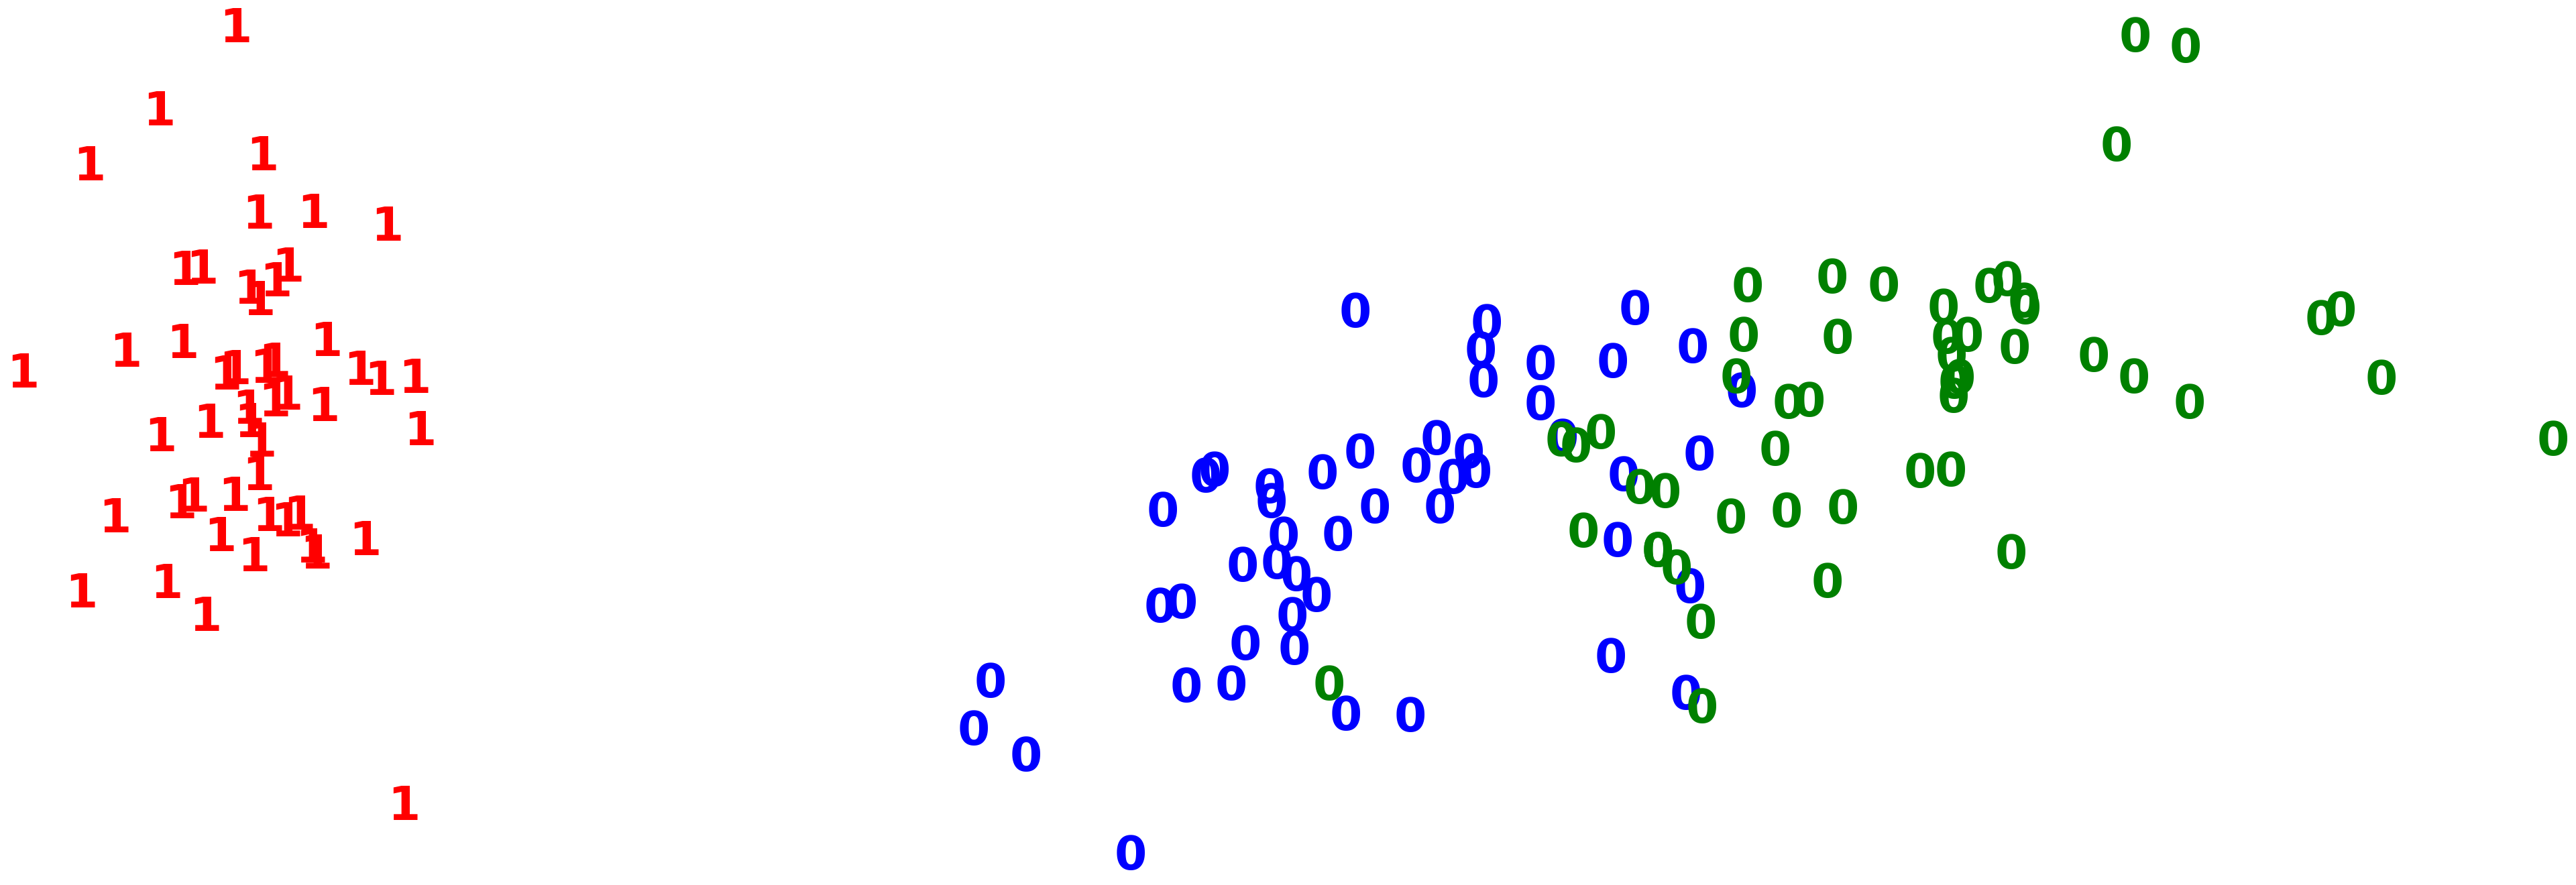

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running with 3 groups
silhouette_score: 0.45994823920518635
random index: 0.8322147651006712
adjusted random index: 0.6201351808870379


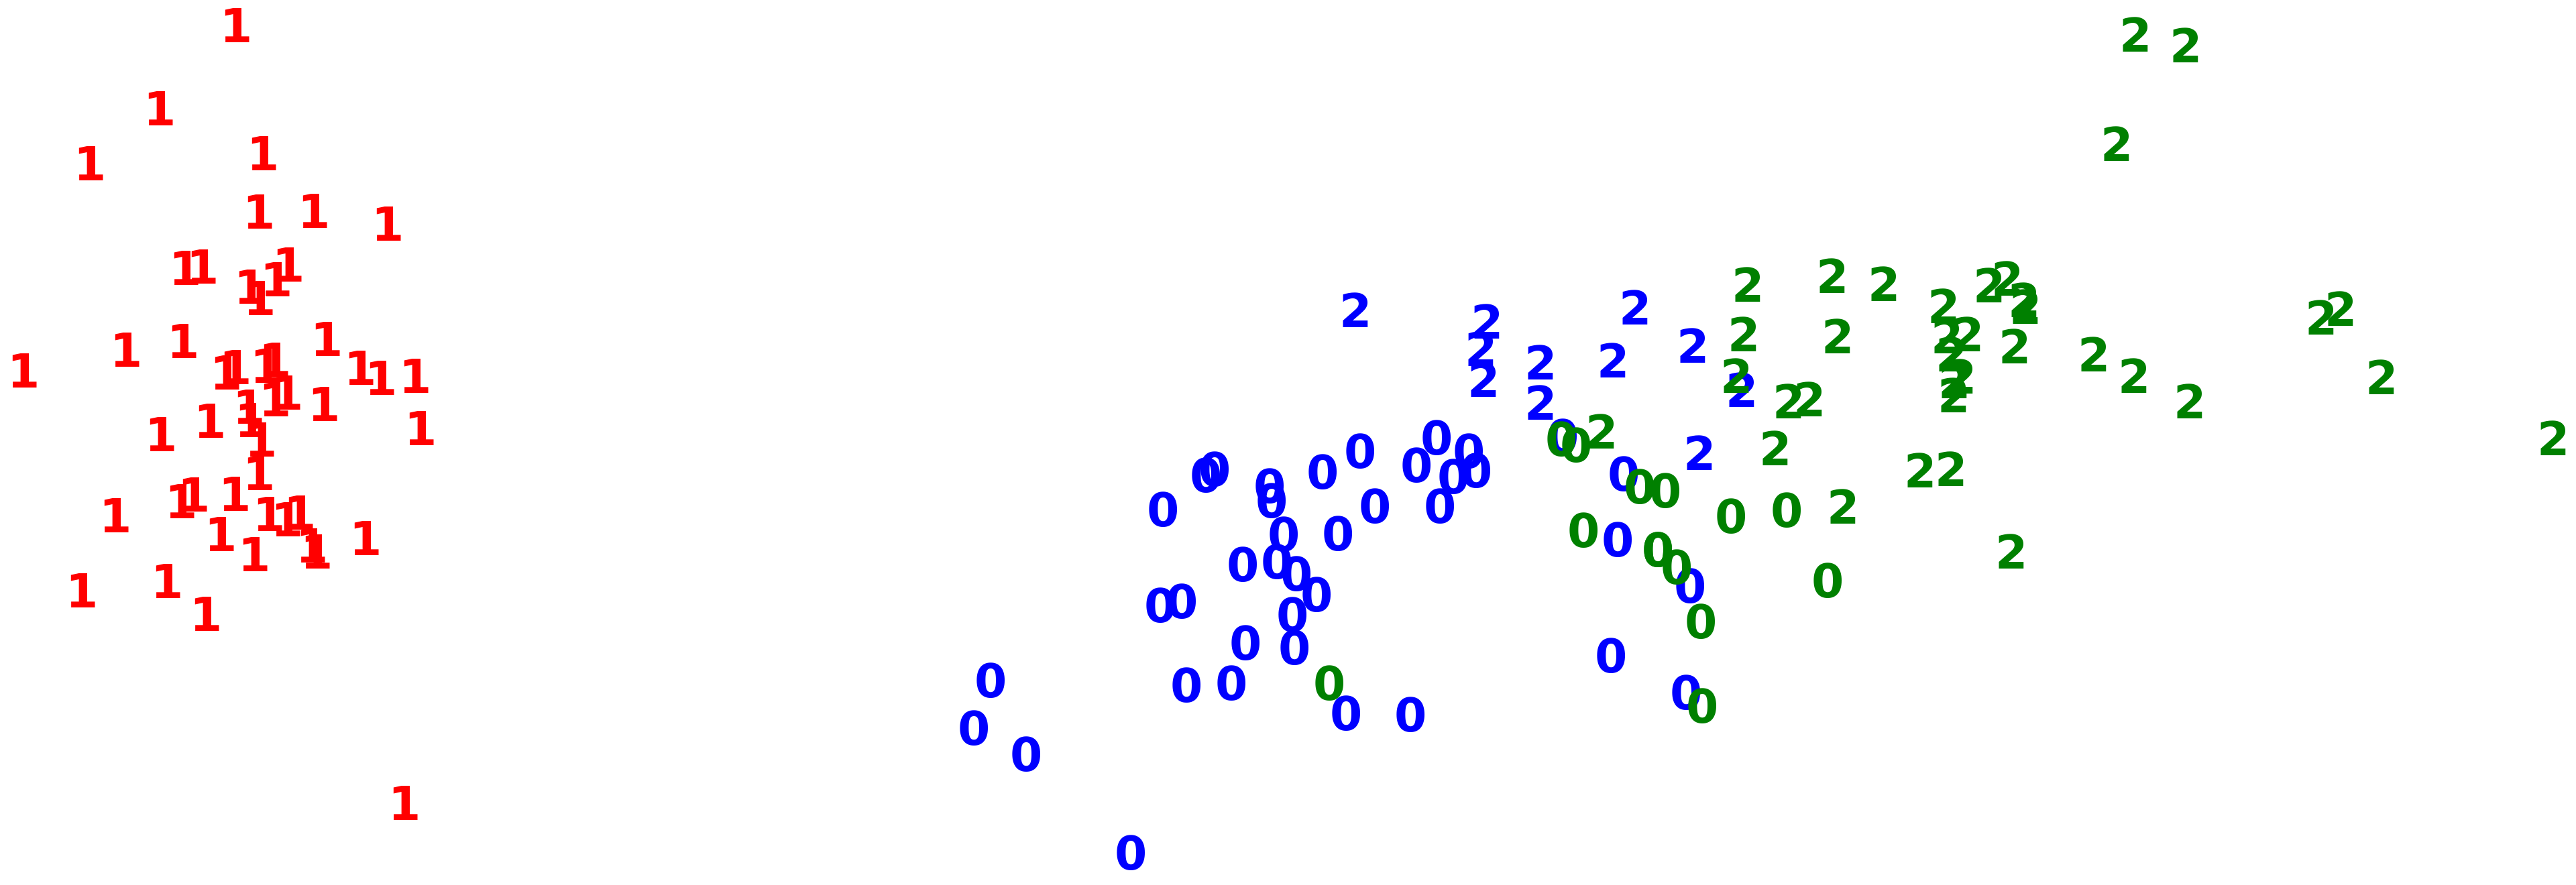

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running with 4 groups
silhouette_score: 0.38822009621659853
random index: 0.7644742729306487
adjusted random index: 0.4440645289331179


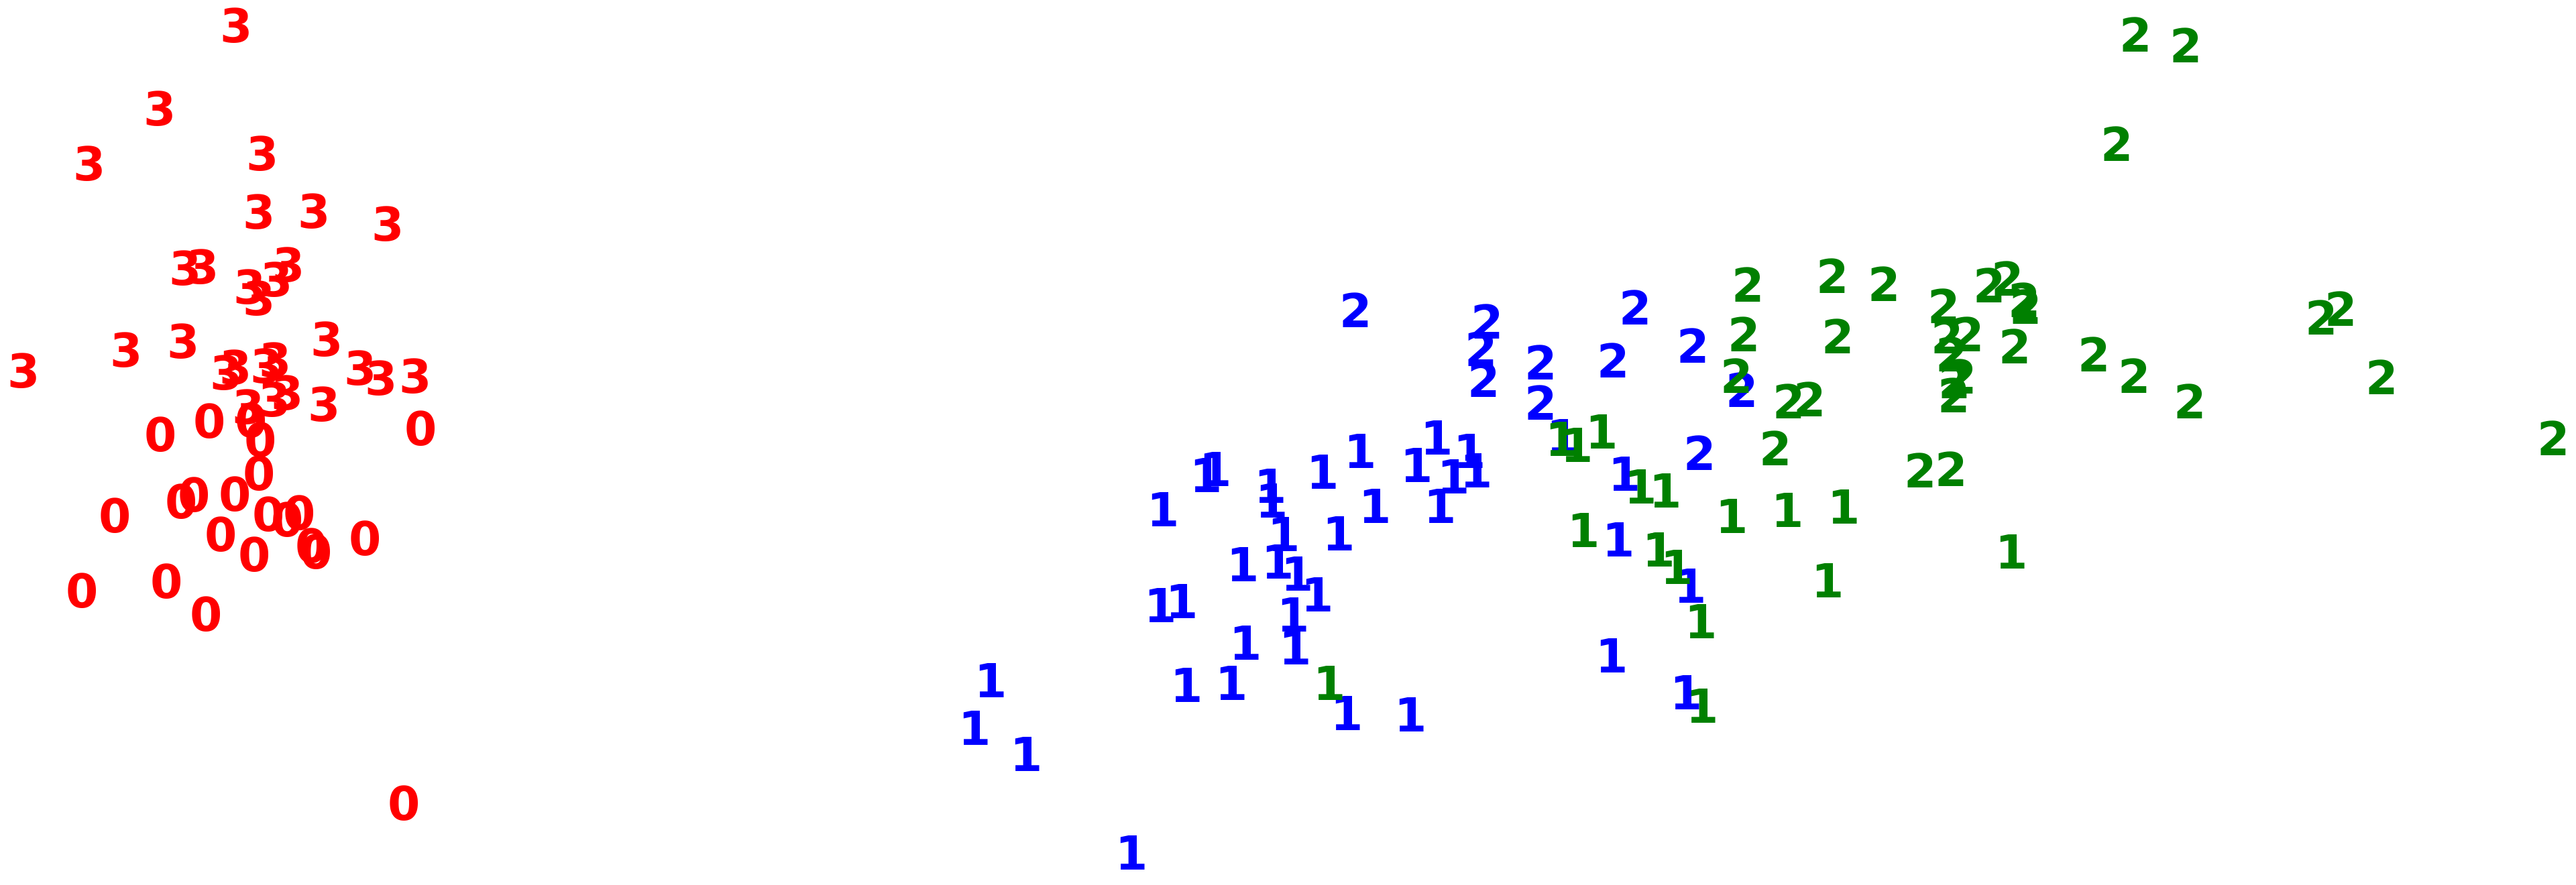

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running with 5 groups
silhouette_score: 0.3455109959980946
random index: 0.7668903803131991
adjusted random index: 0.4204810300834166


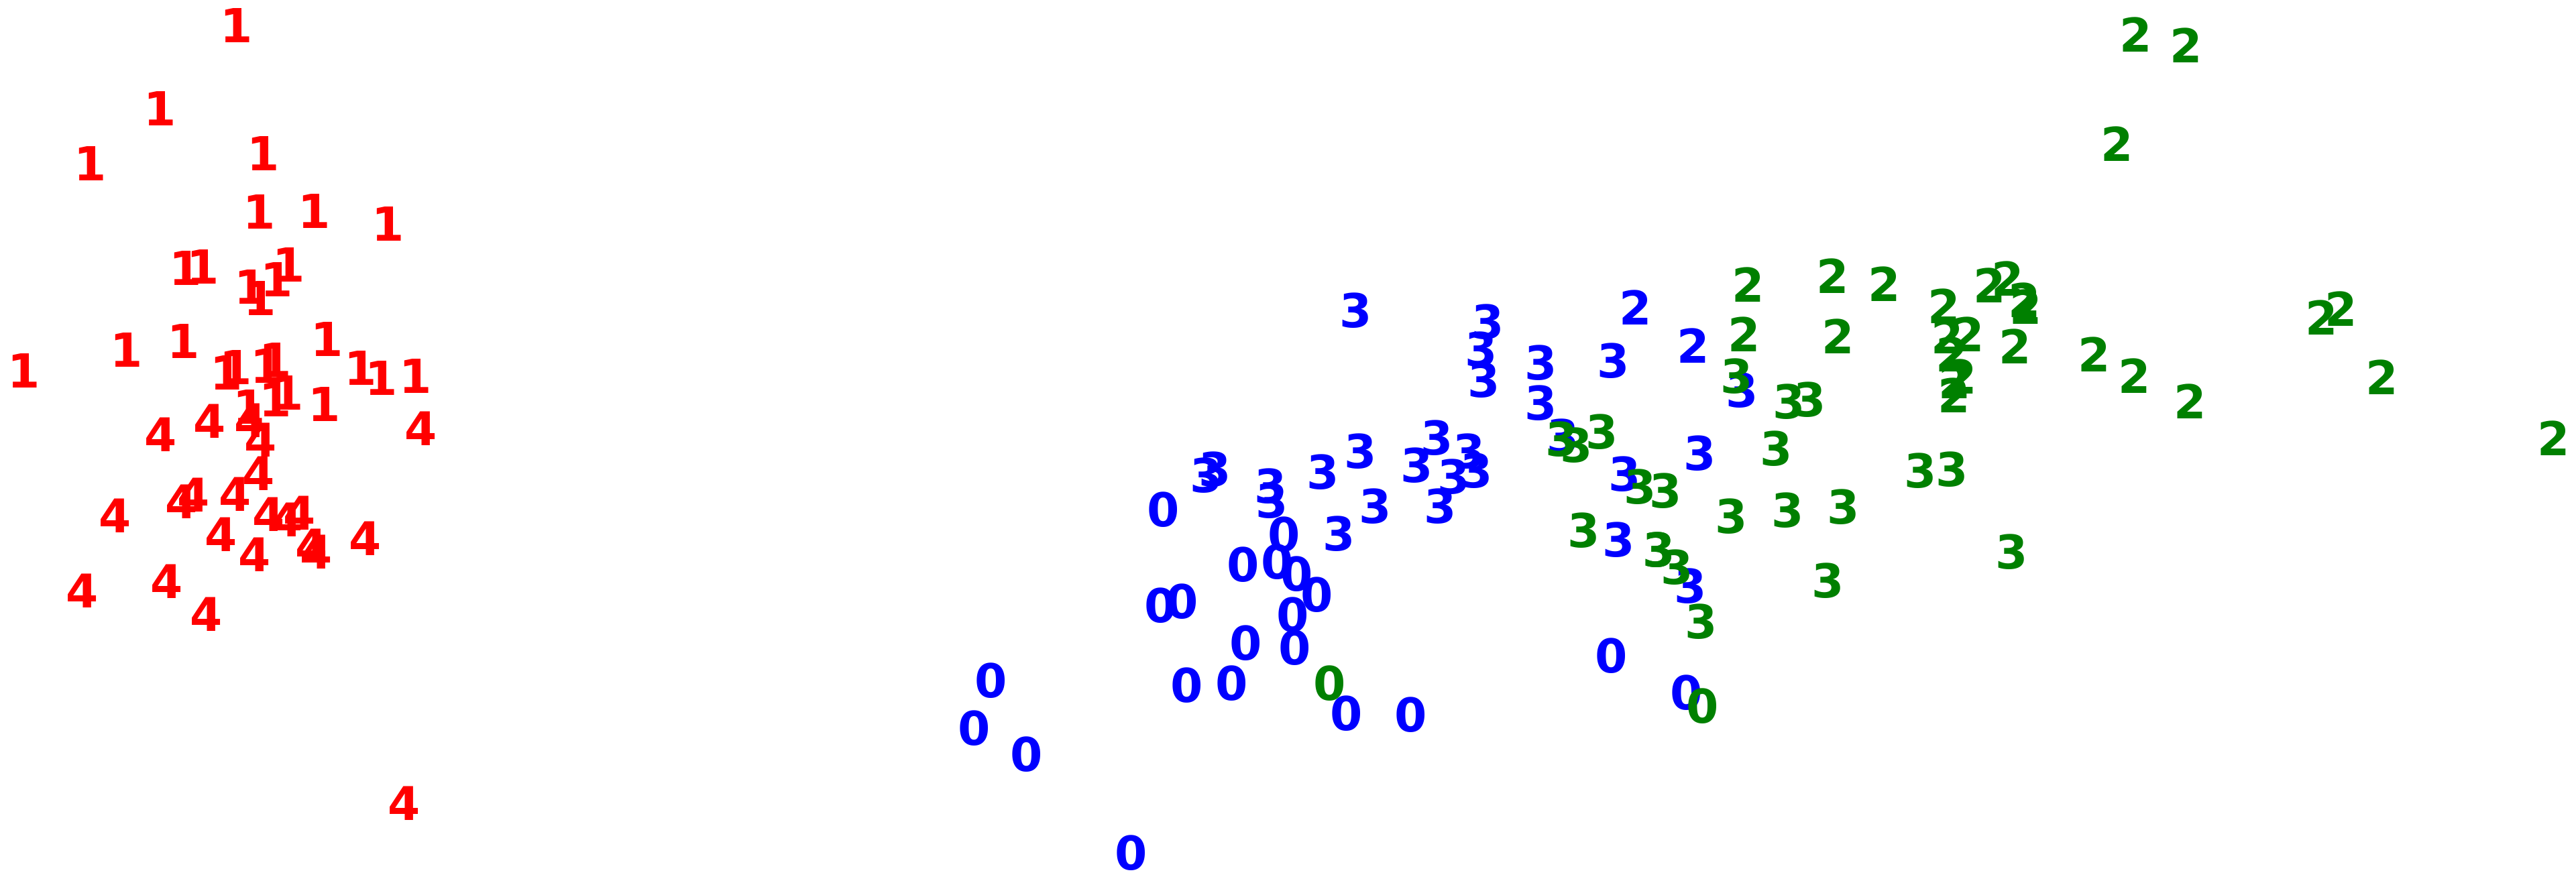

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running with 6 groups
silhouette_score: 0.33118091079136963
random index: 0.7942729306487696
adjusted random index: 0.4678067113176387


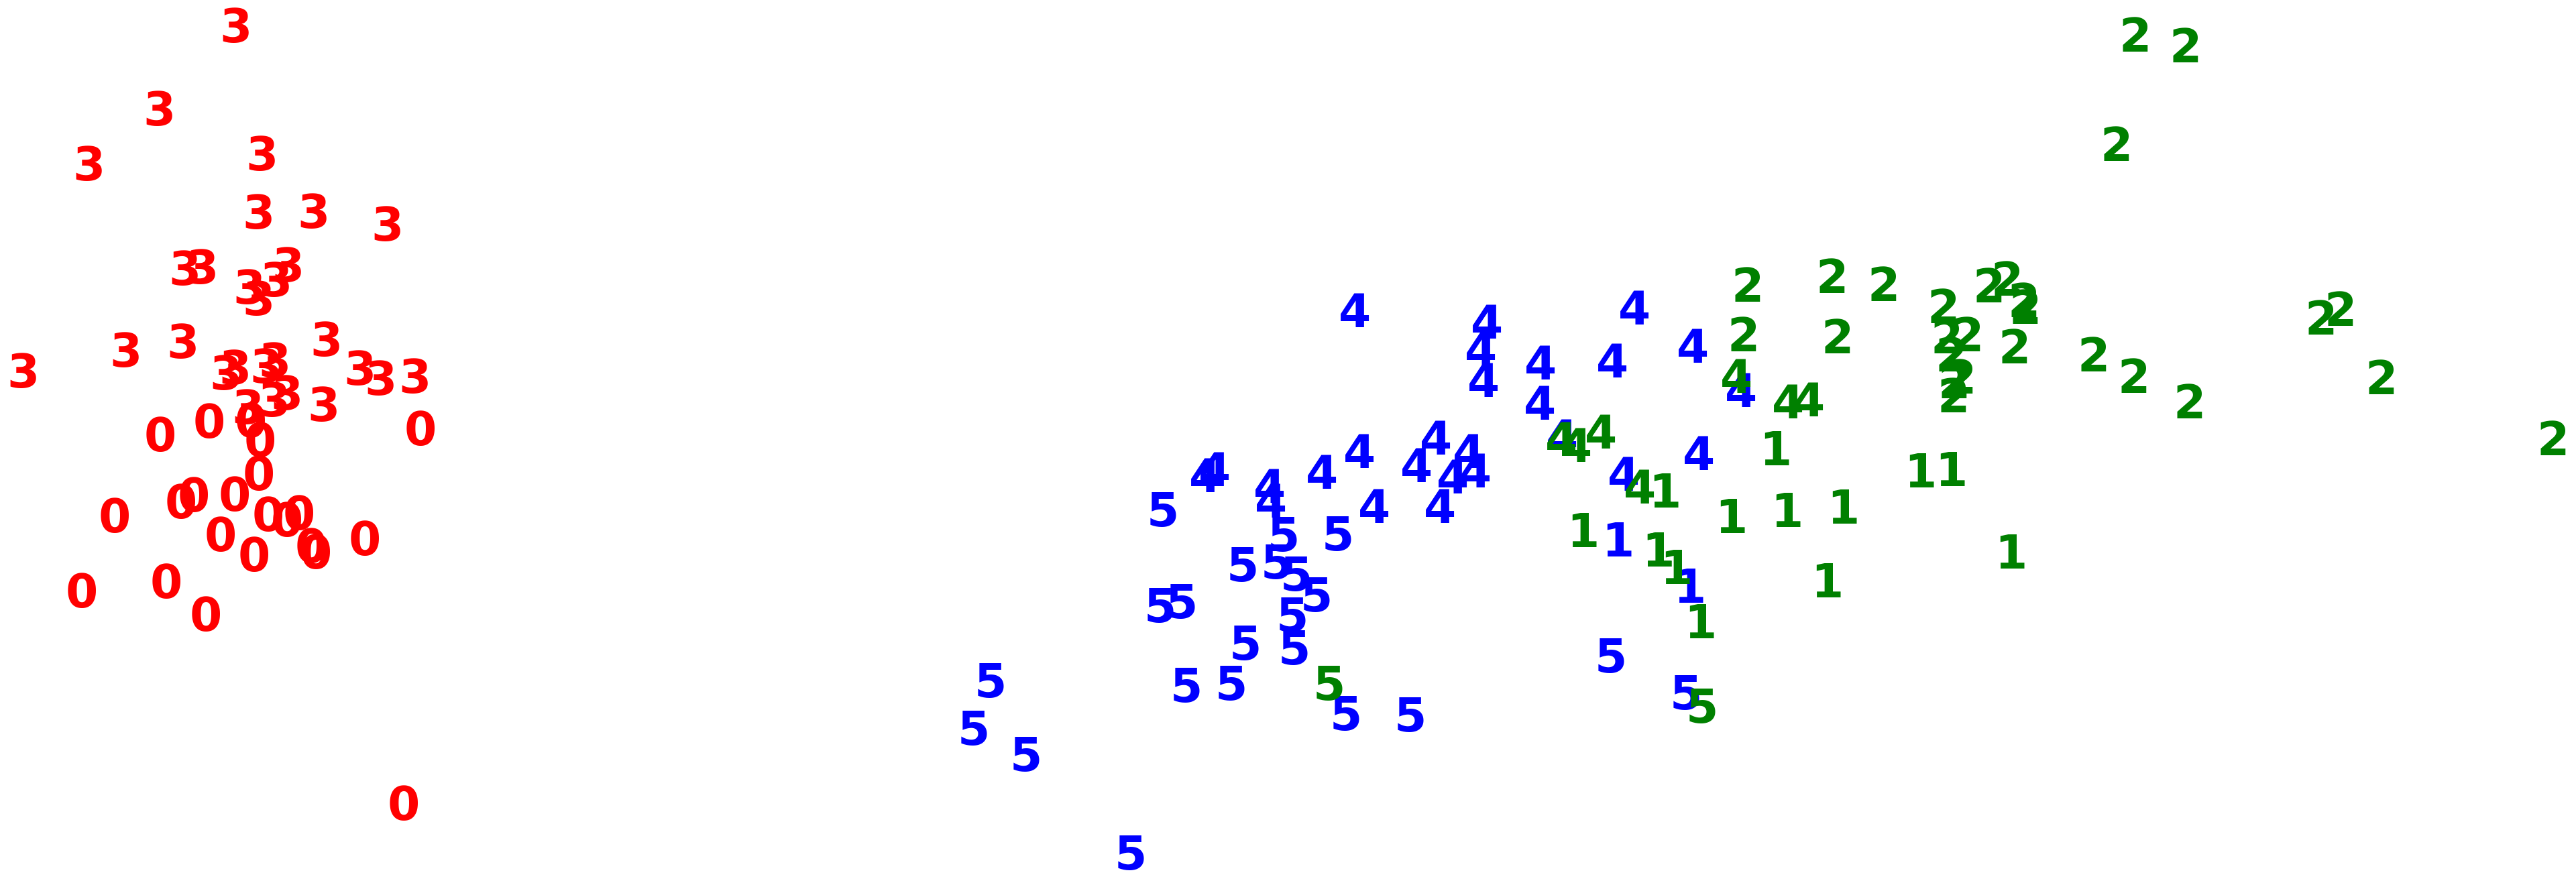

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running with 7 groups
silhouette_score: 0.32567780588302
random index: 0.7504250559284117
adjusted random index: 0.3567216972004861


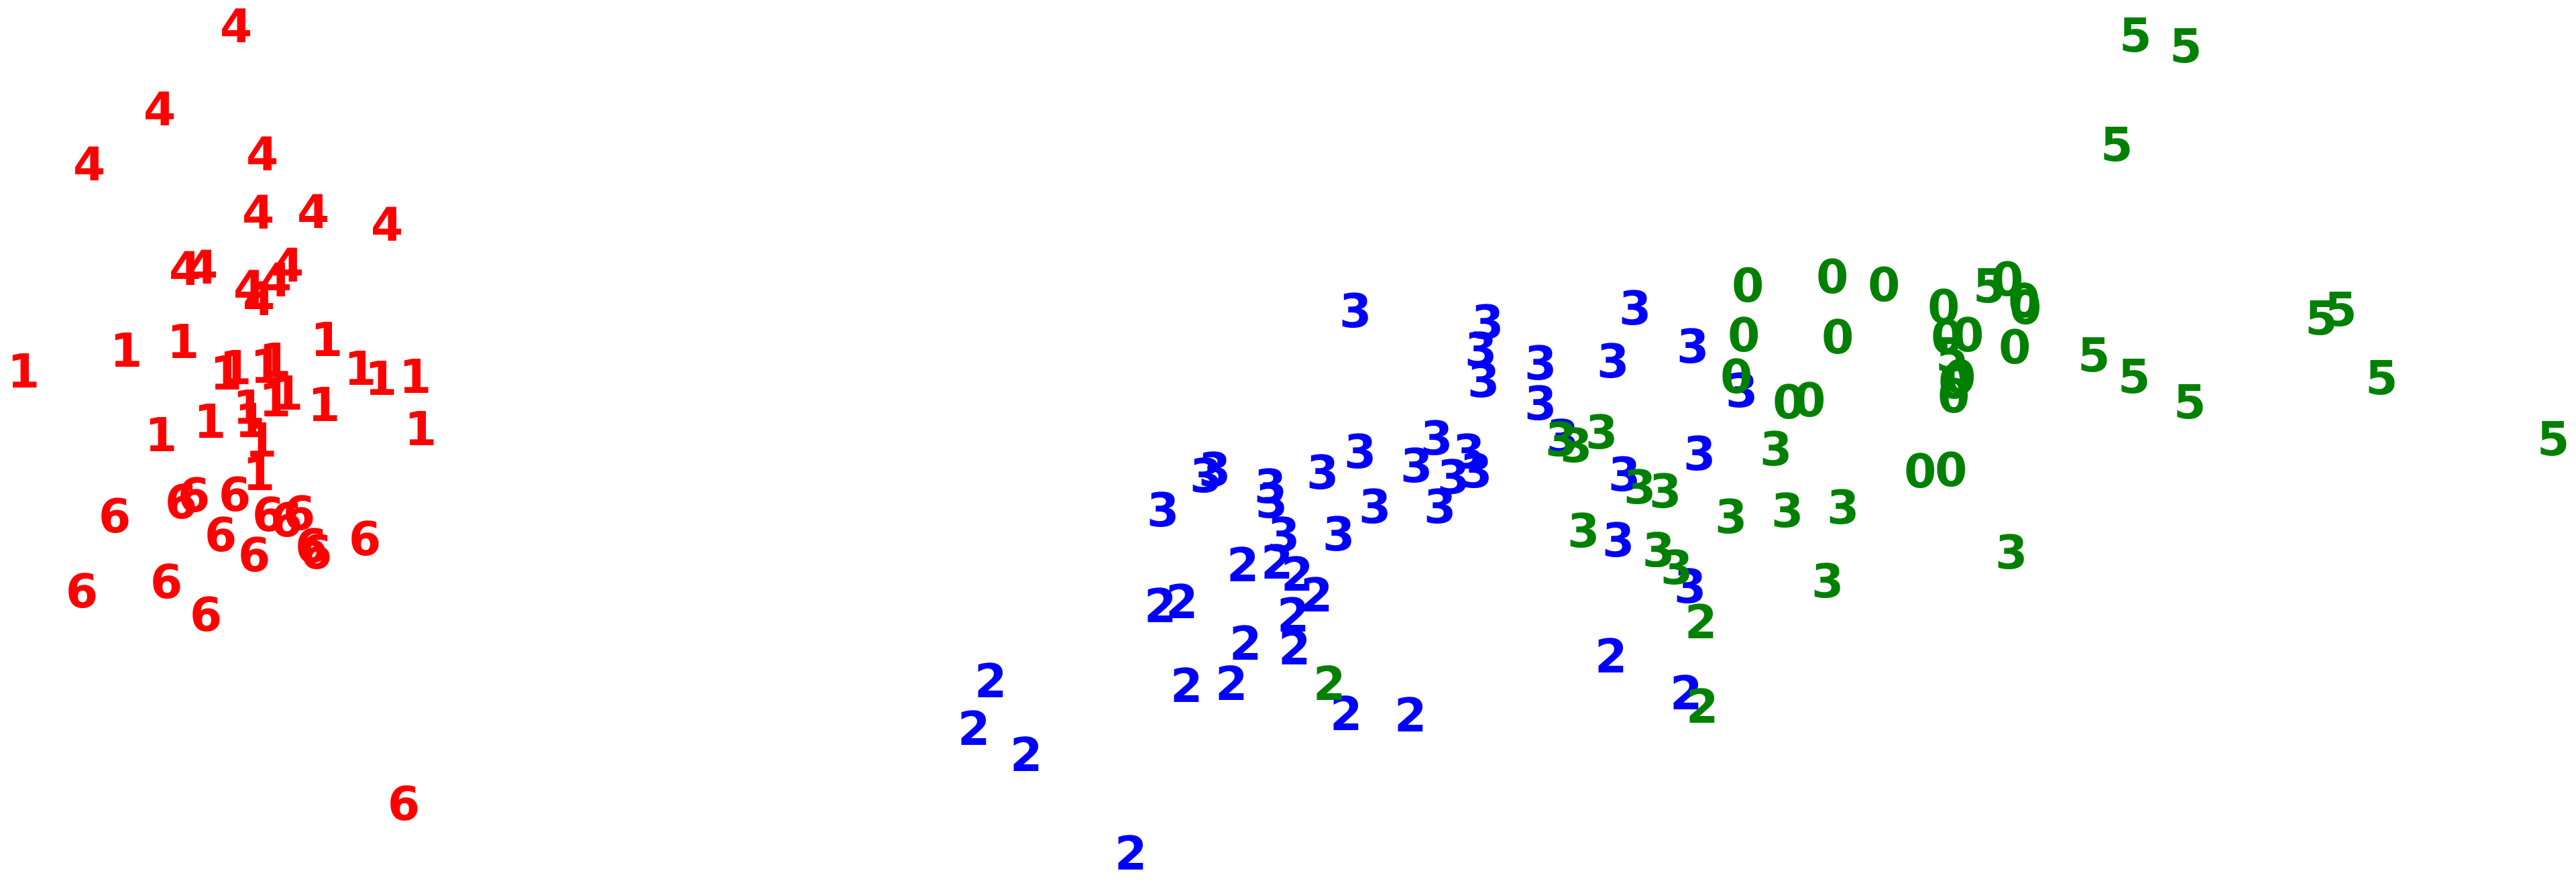

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running with 8 groups
silhouette_score: 0.3428865254008308
random index: 0.7369127516778523
adjusted random index: 0.31513531260259836


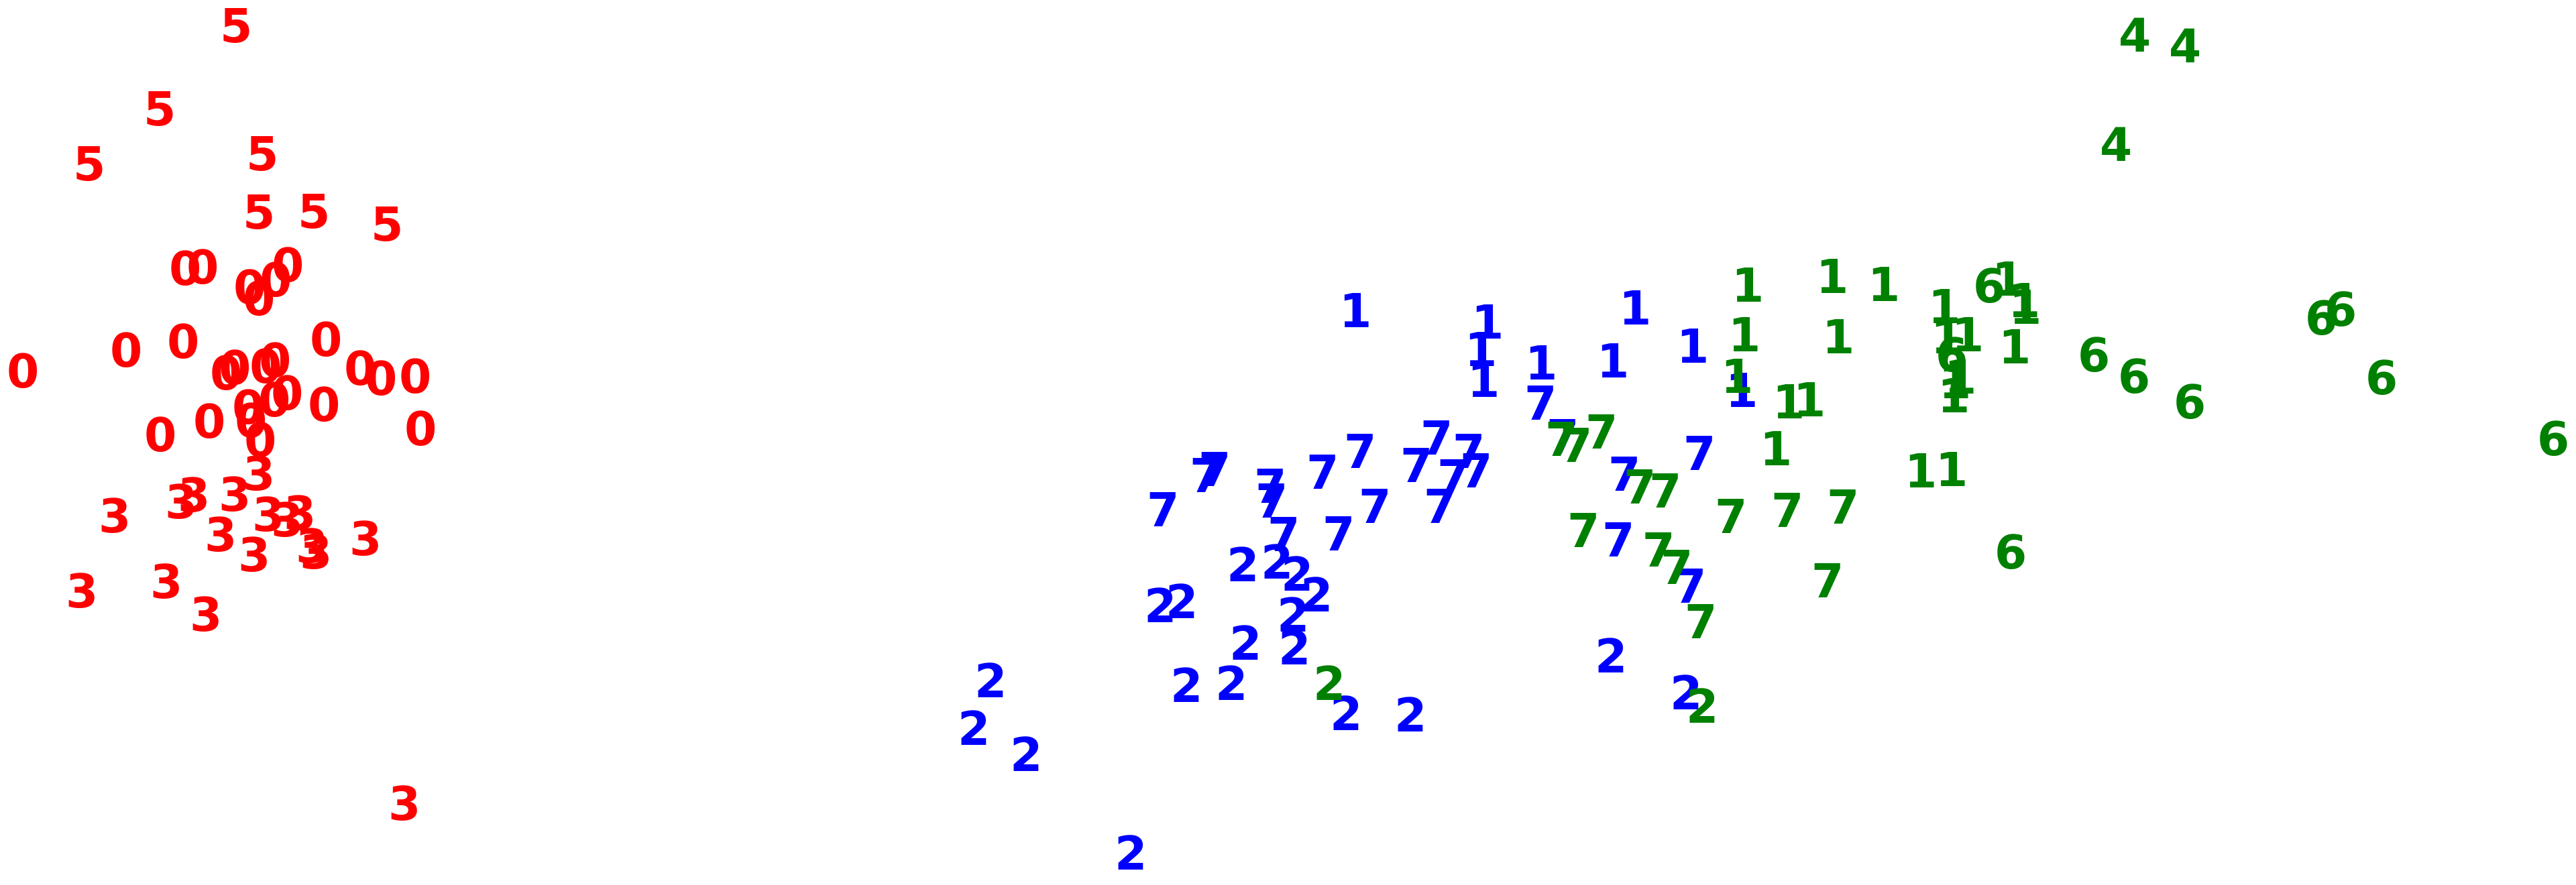

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running with 9 groups
silhouette_score: 0.3218350908849432
random index: 0.7510514541387024
adjusted random index: 0.32017699231152746


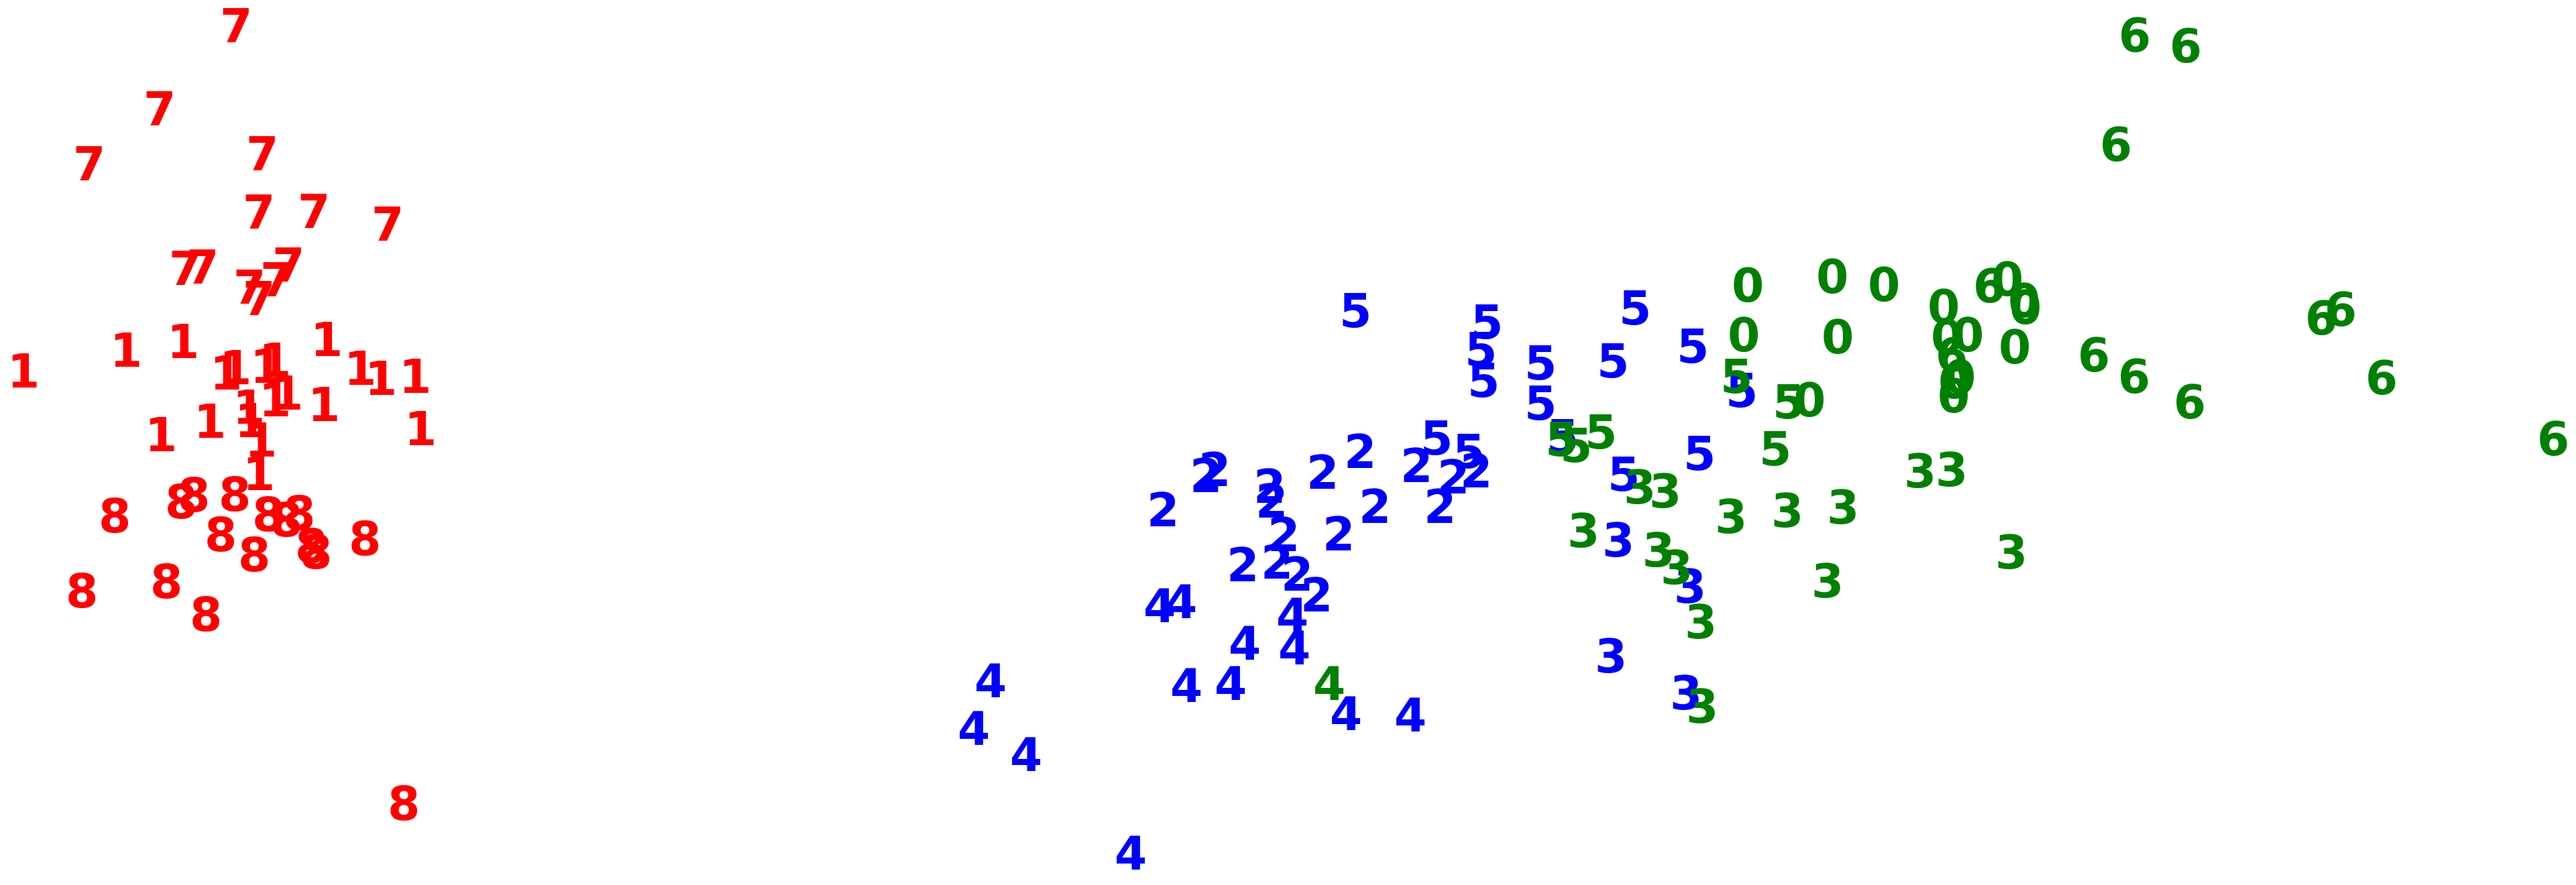

In [33]:

# run with 2 to 5 clusters
# Defining the k-means
for n_clusters in range(2,10,1):
 kmeans_cluster = KMeans(n_clusters=n_clusters, random_state=123)

 # Fit model
 kmeans_cluster.fit(X_std)
 y_pred = kmeans_cluster.predict(X_std)
 print(f'running with {n_clusters} groups')
 print('silhouette_score:',metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
 print('random index:' , metrics.rand_score(y,y_pred))
 print('adjusted random index:' ,metrics.adjusted_rand_score(y,y_pred))
 plot_pred(y_pred)


### silhouette_score, it is best with 2 groups as the grouping is correctly clustered with 2 groups as 2 types is one type and 1 is other type cluster.

In [64]:

import pandas as pd
from sqlalchemy import create_engine
import warnings
engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdiseas_df = pd.read_sql_query('SELECT * FROM heartdisease',con=engine2)
engine2.dispose()

In [65]:
heartdiseas_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [67]:
heartdisease_df = heartdiseas_df.drop(heartdiseas_df.tail(1).index,inplace=False)
heartdisease_df.shape

(302, 14)

In [68]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

In [71]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
from sklearn.model_selection import train_test_split
# Splitting the data into four equally sized samples. First, break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [72]:
# DataFrame to store features and predicted cluster memberships

del ypred 
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time that you go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. You use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the DataFrame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    print('counter ', counter)
    # Put the features into `ypred`
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2-4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

counter  0
counter  1


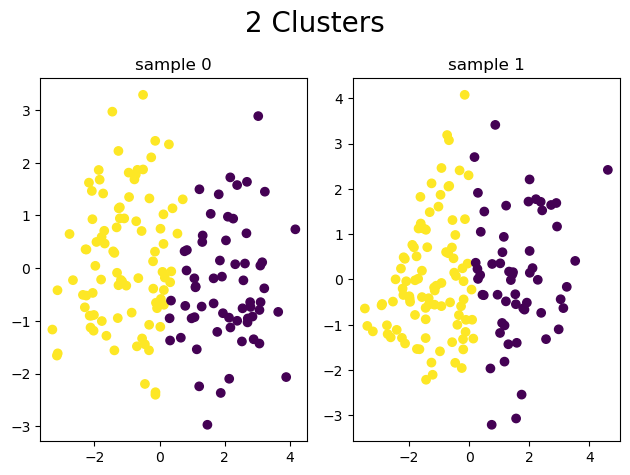

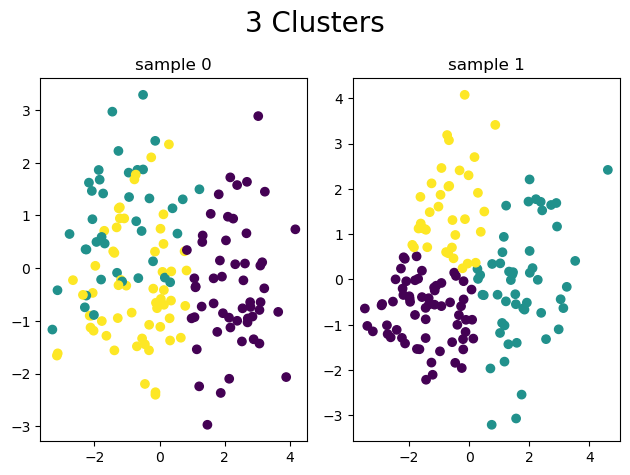

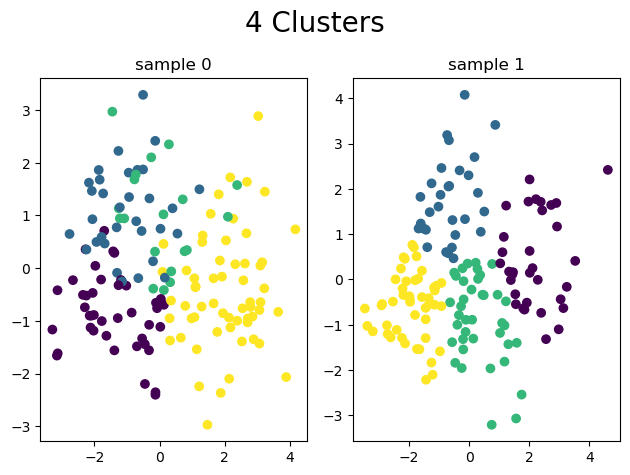

In [73]:
# For each  number of clusters, plot the clusters using the
# PCA features for each sample
for cluster in range(2, 5):
    
    # Make a grid of subplots
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample
    for i in range(2):
        
        # PCA-created features
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

##  Clustering looks better with 2  clusters , as the cluster increases the cluster on both samples does not looks similar. 


In [75]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)
# run with 2 to 5 clusters
# Defining the k-means
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

for n_clusters in range(2,5,1):
 kmeans_cluster = KMeans(n_clusters=n_clusters, random_state=123)

 # Fit model
 kmeans_cluster.fit(X_std)
 y_pred = kmeans_cluster.predict(X_std)
 print(f'running with {n_clusters} groups')
 print('silhouette_score:',metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
 print('random index:' , metrics.rand_score(y,y_pred))
 print('adjusted random index:' ,metrics.adjusted_rand_score(y,y_pred))

running with 2 groups
silhouette_score: 0.17440650461256252
random index: 0.7183560317704781
adjusted random index: 0.43661540614807665
running with 3 groups
silhouette_score: 0.12862190702187828
random index: 0.6400079206178082
adjusted random index: 0.28069413267888504
running with 4 groups
silhouette_score: 0.13186062012858554
random index: 0.5978966359376031
adjusted random index: 0.19689932868308627


# the model scores looks best with 2 groups, and RI is at .71 , ARI is at .43 and silhouette score is at .17